In [1]:
import os
from glob import glob
import numpy as np
import dask
import xarray as xr
import xrft
import cartopy.crs as ccrs
from cmocean import cm
import h5py

from matplotlib import pyplot as plt
%matplotlib inline

from mitequinox.utils import *

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):
/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
from dask_jobqueue import PBSCluster
local_dir = os.getenv('TMPDIR')
cluster = PBSCluster(local_directory=local_dir)
#print(cluster.job_script())
w = cluster.start_workers(6)

/home1/datahome/xyu/.miniconda3/envs/equinox/lib/python3.6/site-packages/distributed/utils.py:128: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [Errno 101] Network is unreachable
  % (host, default, e), RuntimeWarning)


In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [4]:
client

Client Scheduler: tcp://10.148.0.219:40608 Dashboard: http://10.148.0.219:8787/status,Cluster Workers: 12 Cores: 48 Memory: 600.00 GB


---

# 1. Globally-averaged drifter spectra

In [8]:
# Drifter - drogued
data_dir = '/home1/datawork/xyu/Drifters/drifter_data_v1.02/'
ds = xr.open_zarr(data_dir+'E_drifter_qd_globalmean.zarr')
E_drifter_anti_qd = ds.E_drifter_anti
E_drifter_cycl_qd = ds.E_drifter_cycl

In [9]:
# Drifter - undrogued
data_dir = '/home1/datawork/xyu/Drifters/drifter_data_v1.02/'
ds = xr.open_zarr(data_dir+'E_drifter_qu_globalmean.zarr')
E_drifter_anti_qu = ds.E_drifter_anti
E_drifter_cycl_qu = ds.E_drifter_cycl

In [11]:
# make freq negative

E_drifter_anti_qd = E_drifter_anti_qd.assign_coords(freq_time=E_drifter_anti_qd.freq_time * -1.) 
E_drifter_anti_qu = E_drifter_anti_qu.assign_coords(freq_time=E_drifter_anti_qu.freq_time * -1.) 

In [12]:
# tidal frequencies

# at positive frequencies
ptidal_frequency = [0.825518, 0.856952, 0.861809, 0.893244, 0.898101, 0.929536, 0.935012, 0.96097, 0.966446, 0.971303, 0.994524, 0.997262, 1, 1.00274, 1.00548, 1.00821, 1.03417, 1.03903, 1.06499, 1.07046, 1.07594, 1.11223, 1.76053, 1.79196, 1.79682, 1.79744, 1.8234, 1.82826, 1.83373, 1.8536, 1.85907, 1.85969, 1.86455, 1.89051,1.89598,
1.90084,1.90693,1.9268,1.92742,1.92954,1.93227,1.93501,1.93775,1.94323,1.95823,1.96371,1.96857,1.99452,1.99726,2,2.00274,2.00548,2.03629,2.04177,2.04724,2.06773,2.07258,2.0732,2.10402,2.82552,2.86181,2.89841,2.89872,2.92954,2.93501,2.99726,3.00274,
3.76053,3.79196,3.79682,3.82278,3.82826,3.83373,3.85907,3.86455,3.87002,3.89598,3.90146,3.93227,3.93775,3.96857,4,4.00548,4.75779,4.79408,4.79956,4.83099,4.86181,4.86729,4.93501,4.94049,5.00274,5.69342,5.72424,5.72971,5.76053,5.76601,5.79135,5.79682,
5.82826,5.83373,5.85907,5.86455,5.87002,5.90146,5.93227,5.93775,6,6.69006,6.72698,6.76296,6.79408,6.79956,6.86729,7.65651,7.6928,7.69828,7.72909,7.76053,7.76601,7.79682,7.8023,7.83373,7.86455,7.87002,8.65925,8.69554,8.73183,8.79956,9.62508,9.66137,
9.6928,9.72909,9.76601,9.79682,10.7318,11.5936,11.6614,11.6983] 

# at negative frequencies
ntidal_frequency = [ -x for x in ptidal_frequency]

# 2. Figure together

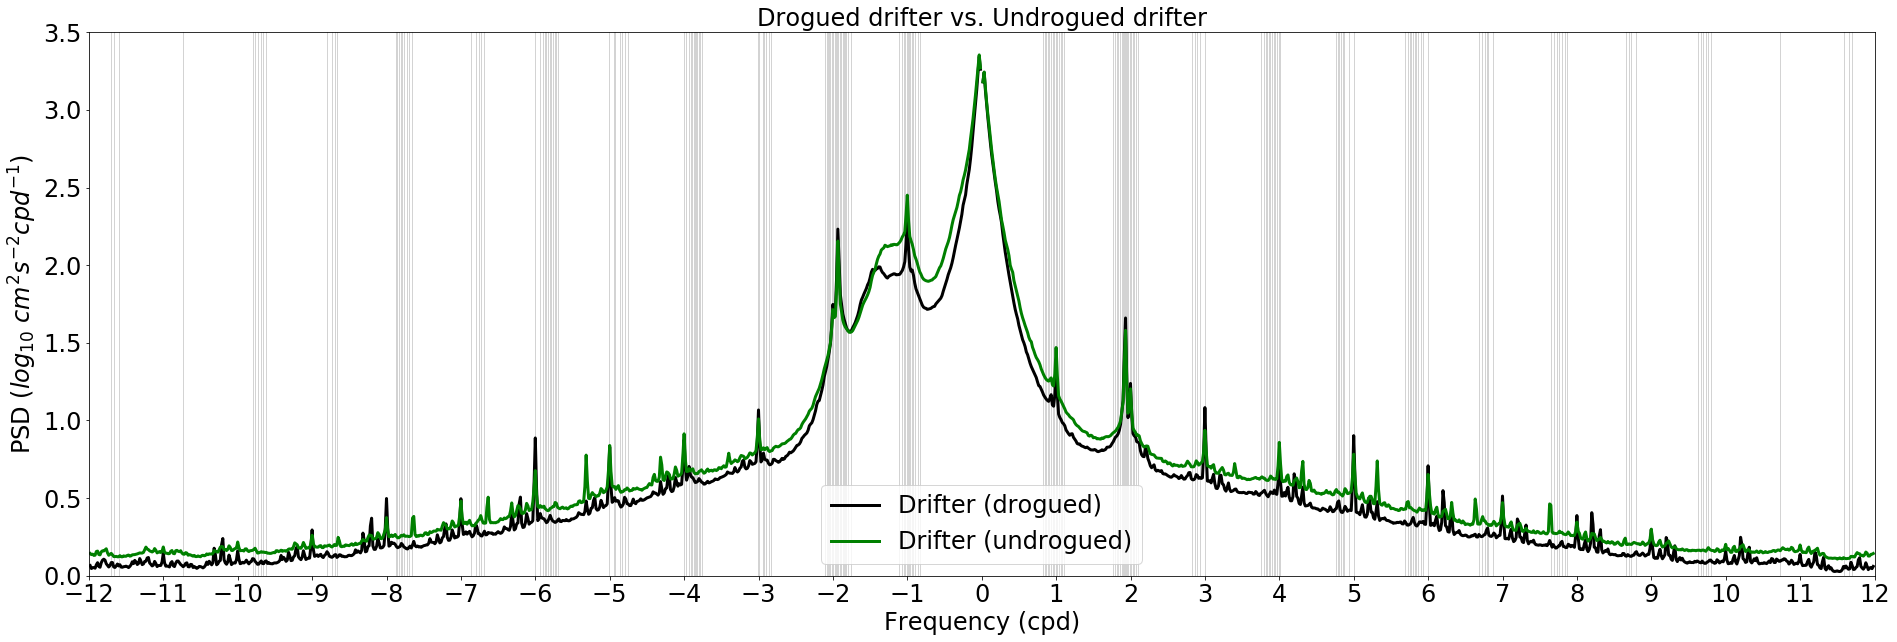

In [29]:
font_size = 24

fig, ax = plt.subplots(figsize=(32,10))


# Global averaged
ax = plt.subplot(1,1,1)
labels = ['Drifter (drogued)', 'Drifter (undrogued)','']
# tidal frequencies - vertical lightgrey lines
ax.plot([ptidal_frequency,ptidal_frequency],[-2,4], linewidth=1, color='lightgrey') 
ax.plot([ntidal_frequency,ntidal_frequency],[-2,4], linewidth=1, color='lightgrey') 
# drifter (drogued)
np.log10(E_drifter_cycl_qd).plot(ax=ax, linewidth=3, color='black', label=labels[0])
np.log10(E_drifter_anti_qd).plot(ax=ax, linewidth=3, color='black', label=labels[2])
# drifter (drogued & GPS)
np.log10(E_drifter_cycl_qu).plot(ax=ax, linewidth=3, color='green', label=labels[1])
np.log10(E_drifter_anti_qu).plot(ax=ax, linewidth=3, color='green', label=labels[2])
#ax.grid()
ax.set_ylim([0,3.5])
ax.set_yticks([0., 0.5, 1., 1.5, 2., 2.5, 3., 3.5])
ax.set_xlim([-12.,12.])
ax.set_xticks([-12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0., 1., 2., 3., 4., 5., 6., 7., 8., 9., 10., 11., 12.])
ax.legend(prop={'size': font_size},loc="upper right")
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('Drogued drifter vs. Undrogued drifter',fontsize=font_size)
ax.legend(prop={'size': font_size},loc='lower center')

plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/FigureS2.png')


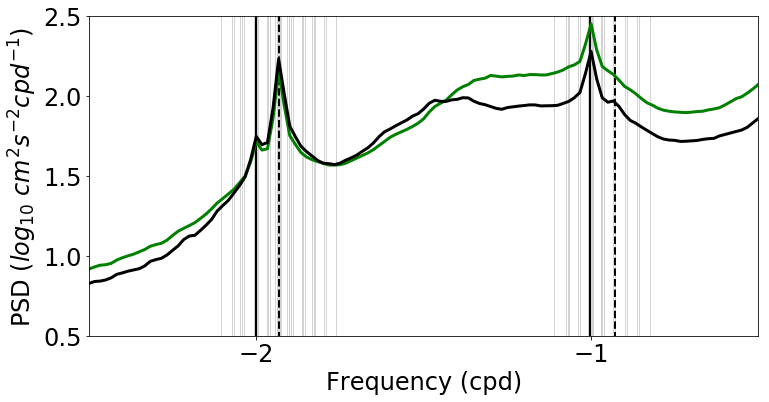

In [26]:
font_size = 24

fig, ax = plt.subplots(figsize=(12,20))


# Global averaged
ax = plt.subplot(3,2,(3,4))
labels = ['Drifter (drogued)', 'Drifter (undrogued)','']
# tidal frequencies - vertical lightgrey lines
ax.plot([ptidal_frequency,ptidal_frequency],[-2,4], linewidth=1, color='lightgrey') 
ax.plot([ntidal_frequency,ntidal_frequency],[-2,4], linewidth=1, color='lightgrey') 

ax.plot([-0.929536,-0.929536],[-2,4], 'k--', linewidth=2)        # O1
ax.plot([-1.00274,-1.00274],[-2,4], linewidth=2, color='black')  # K1
ax.plot([-2.00,-2.00],[-2,4], linewidth=2, color='black')  # S2
ax.plot([-1.93227,-1.93227],[-2,4], 'k--',linewidth=2)           # M2


# drifter (drogued & GPS)
np.log10(E_drifter_cycl_qu).plot(ax=ax, linewidth=3, color='green', label=labels[1])
np.log10(E_drifter_anti_qu).plot(ax=ax, linewidth=3, color='green', label=labels[2])
# drifter (drogued)
np.log10(E_drifter_cycl_qd).plot(ax=ax, linewidth=3, color='black', label=labels[0])
np.log10(E_drifter_anti_qd).plot(ax=ax, linewidth=3, color='black', label=labels[2])
ax.set_ylim([0.5,2.5])
ax.set_yticks([0.5, 1., 1.5, 2., 2.5])
ax.set_xlim([-2.5,-0.5])
ax.set_xticks([-2, -1])
#ax.legend(prop={'size': font_size},loc="upper right")
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/FigureS2_inset1.png')


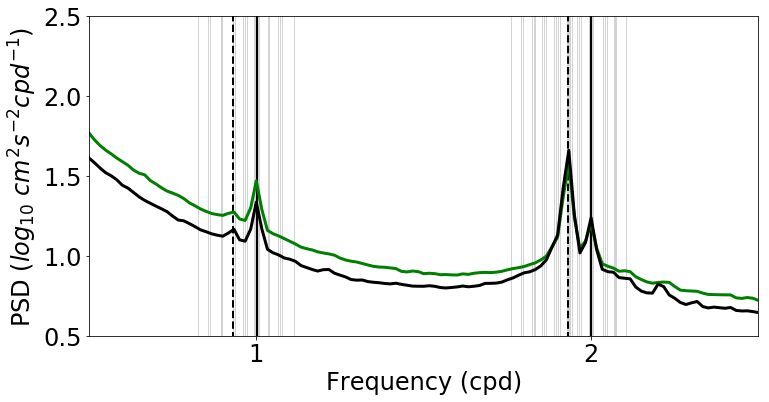

In [27]:
font_size = 24

fig, ax = plt.subplots(figsize=(12,20))


# Global averaged
ax = plt.subplot(3,2,(3,4))
labels = ['Drifter (drogued)', 'Drifter (undrogued)','']
# tidal frequencies - vertical lightgrey lines
ax.plot([ptidal_frequency,ptidal_frequency],[-2,4], linewidth=1, color='lightgrey') 
ax.plot([ntidal_frequency,ntidal_frequency],[-2,4], linewidth=1, color='lightgrey') 

ax.plot([0.929536,0.929536],[-2,4], 'k--', linewidth=2)        # O1
ax.plot([1.00274,1.00274],[-2,4], linewidth=2, color='black')  # K1
ax.plot([2.00,2.00],[-2,4], linewidth=2, color='black')  # S2
ax.plot([1.93227,1.93227],[-2,4], 'k--',linewidth=2)           # M2


# drifter (drogued & GPS)
np.log10(E_drifter_cycl_qu).plot(ax=ax, linewidth=3, color='green', label=labels[1])
np.log10(E_drifter_anti_qu).plot(ax=ax, linewidth=3, color='green', label=labels[2])
# drifter (drogued)
np.log10(E_drifter_cycl_qd).plot(ax=ax, linewidth=3, color='black', label=labels[0])
np.log10(E_drifter_anti_qd).plot(ax=ax, linewidth=3, color='black', label=labels[2])
ax.set_ylim([0.5,2.5])
ax.set_yticks([0.5, 1., 1.5, 2., 2.5])
ax.set_xlim([0.5,2.5])
ax.set_xticks([1,2])
#ax.legend(prop={'size': font_size},loc="upper right")
ax.set_ylabel('PSD ($log_{10}\ cm^2 s^{-2} cpd^{-1})$',fontsize=font_size)
ax.set_xlabel('Frequency (cpd)',fontsize=font_size)
ax.tick_params(labelsize=font_size)
ax.set_title('',fontsize=font_size)

plt.savefig('/home1/datahome/xyu/equinox_working/sandbox/Figures/FigureS2_inset2.png')


In [78]:
cluster.scheduler.close()

<Future finished result=None>